# Model Inference Graded Challenge 7

by **M.Arindra Jehan** (HCK-015)

## Import Libraries

In [4]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import joblib
from joblib import load
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load Test Data

In [11]:
# Data Scaling
test_datagen = ImageDataGenerator(rescale=1./255.)

# Make test data from directory
test_gen = test_datagen.flow_from_directory(
	"/tmp/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test",
	target_size=(150,150),
	class_mode='binary',
  batch_size=126,
	shuffle=True,
    seed=2
)

print("\n", test_gen.class_indices)

Found 500 images belonging to 2 classes.

 {'fractured': 0, 'not fractured': 1}


**description** : 

There are **500 images** in the test generator with the class `fractured`(0) and `not fractured`(1)

## Load Model

In [7]:
# Load Model
model = load("cnn_model_final.joblib")

**description** :

Load the Improved Functional API model

## Random Image Generator

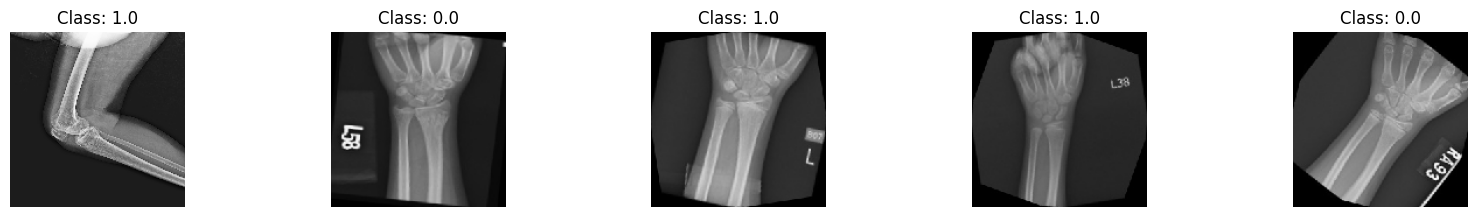

In [8]:
# Generate 5 random indices for the images
num_images = 5
batch = test_gen.__next__()
idx = np.random.randint(len(batch[0]), size=num_images)

# Preprocess the images to match the input shape of the model
images = batch[0][idx]
class_labels = batch[1][idx]

# Display the images using matplotlib
plt.figure(figsize=(20, 5))
for i in range(num_images):
    plt.subplot(2, num_images, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Class: {class_labels[i]}")
    plt.axis('off')
plt.show()

**description** :

Figure above shows 5 random images from the test set, to test if the model can predict the pictures.

We can see above that the random images shows the class of `[1, 0, 1, 1, 0]` with :
- 1 defined as not fractured 
- 0 defined as fractured

## Model Prediction

In [9]:
# Use the model to predict the images
predictions = model.predict(images)

# Post-process the predictions as needed
labels = np.zeros(num_images)
for i in range(num_images):
    if predictions[i] > 0.5:
        labels[i] = 1
    else:
        labels[i] = 0

# Print the predictions
print(f'Predicted labels: {labels}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
Predicted labels: [1. 0. 1. 1. 0.]


**description** :

Output above shows the prediction the model made from the random images, we can see that the output shows the class of `[1, 0, 1, 1, 0]`.

In conclusion, **the model correctly predict the random images** from the test set and we can say that the model perform well.

The model is now safe for deployment